# NOTEBOOK JULIA

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('complex-master-learn-and-get-your-mark/train.csv')

In [13]:
df.head()

,Id,PreferedAlbum,Vinyl,AvgTime,TicketInfo,Opinion,Concert,Age,VIP,Food,Drinks,FreePass
0,01/2362,Head Hunters,False,3.055,B/140/N,"Everything worked, yet nothing surprised me. (...",NYC12-5pm,22.0,False,170.0,1.0,True
1,04/0599,Bright Size Life,True,2.510,LB/124/N,"Solid gig—nothing magical, nothing awful. (NYC...",NYC12-5pm,9.0,False,0.0,0.0,True
2,01/3223,Head Hunters,False,0.803,CB/523/N,"Guitars were sharp, but everything else felt r...",NYC12-5pm,NaN,False,815.0,37.0,False
3,01/1966,Kind of Blue,False,0.568,A/81/XL,Feedback screamed louder than the guitars. Dis...,FL16-7pm,36.0,False,1427.0,1395.0,False
4,01/8850,Bright Size Life,False,0.034,B/580/XL,NaN,NYC12-5pm,16.0,False,1299.0,0.0,False


In [14]:
df.shape

(10116, 12)

In [15]:
df.columns

Index(['Id', 'PreferedAlbum', 'Vinyl', 'AvgTime', 'TicketInfo', 'Opinion',
       'Concert', 'Age', 'VIP', 'Food', 'Drinks', 'FreePass'],
      dtype='object')

In [16]:
col_names = df.columns.tolist()

print("Column names:")
print(col_names)

to_show = col_names[:6] + col_names[-6:]

print ("\nSample data:")
df[to_show].head(6)

Column names:
['Id', 'PreferedAlbum', 'Vinyl', 'AvgTime', 'TicketInfo', 'Opinion', 'Concert', 'Age', 'VIP', 'Food', 'Drinks', 'FreePass']

Sample data:


,Id,PreferedAlbum,Vinyl,AvgTime,TicketInfo,Opinion,Concert,Age,VIP,Food,Drinks,FreePass
0,01/2362,Head Hunters,False,3.055,B/140/N,"Everything worked, yet nothing surprised me. (...",NYC12-5pm,22.0,False,170.0,1.0,True
1,04/0599,Bright Size Life,True,2.510,LB/124/N,"Solid gig—nothing magical, nothing awful. (NYC...",NYC12-5pm,9.0,False,0.0,0.0,True
2,01/3223,Head Hunters,False,0.803,CB/523/N,"Guitars were sharp, but everything else felt r...",NYC12-5pm,NaN,False,815.0,37.0,False
3,01/1966,Kind of Blue,False,0.568,A/81/XL,Feedback screamed louder than the guitars. Dis...,FL16-7pm,36.0,False,1427.0,1395.0,False
4,01/8850,Bright Size Life,False,0.034,B/580/XL,NaN,NYC12-5pm,16.0,False,1299.0,0.0,False
5,03/0753,Kind of Blue,True,2.816,NaN,World-class musicianship; I’d travel to see th...,FL16-7pm,42.0,False,0.0,0.0,True


Freepass

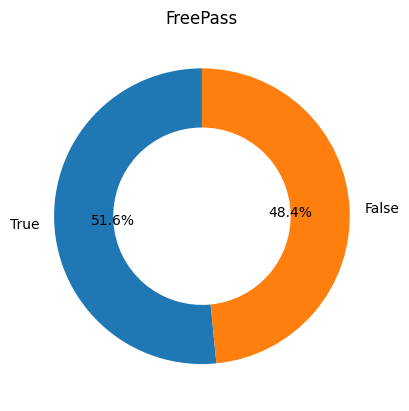

In [17]:
conteo = df["FreePass"].value_counts()

plt.figure()
plt.pie(
    conteo,
    labels=conteo.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)  # esto lo hace donut
)

plt.title("FreePass")
plt.show()

Más o menos 50% a cada lado

Edades

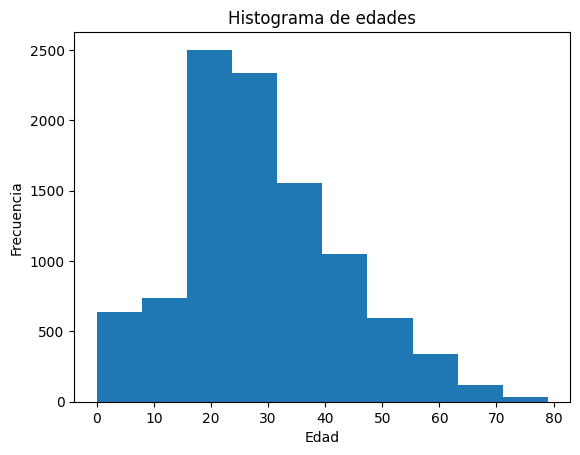

In [18]:
import matplotlib.pyplot as plt

plt.hist(df["Age"], bins=10)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma de edades")
plt.show()


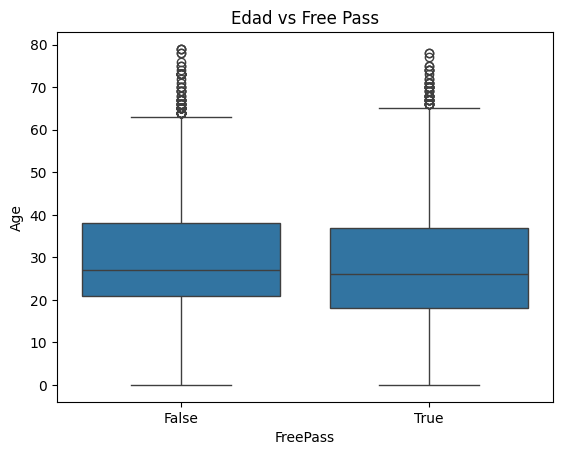

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="FreePass", y="Age", data=df_test)
plt.title("Edad vs Free Pass")
plt.show()


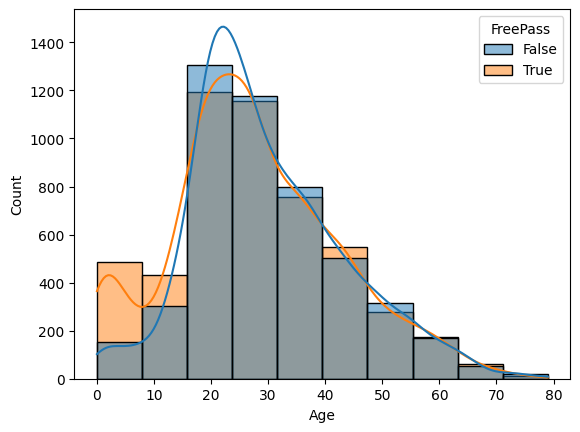

In [19]:
sns.histplot(data=df, x="Age", hue="FreePass", bins=10, kde=True)
plt.show()


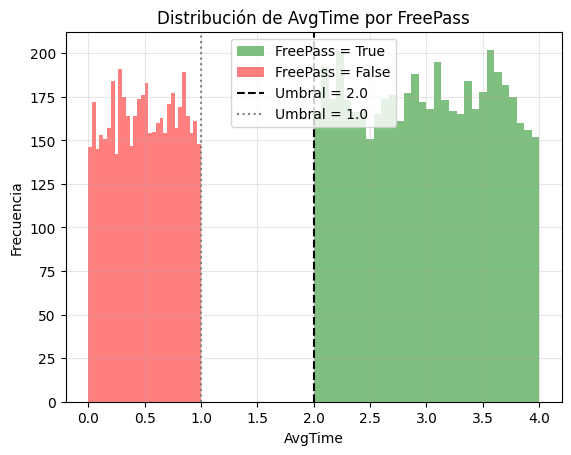

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Crear histogramas superpuestos
plt.hist(df[df['FreePass'] == True]['AvgTime'], 
         bins=30, alpha=0.5, label='FreePass = True', color='green')
plt.hist(df[df['FreePass'] == False]['AvgTime'], 
         bins=30, alpha=0.5, label='FreePass = False', color='red')

plt.axvline(x=2.0, color='black', linestyle='--', label='Umbral = 2.0')
plt.axvline(x=1.0, color='gray', linestyle=':', label='Umbral = 1.0')

plt.xlabel('AvgTime')
plt.ylabel('Frecuencia')
plt.title('Distribución de AvgTime por FreePass')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()